In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('all_seasons.csv')

# Display the first few rows of the dataframe
df.head()



,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


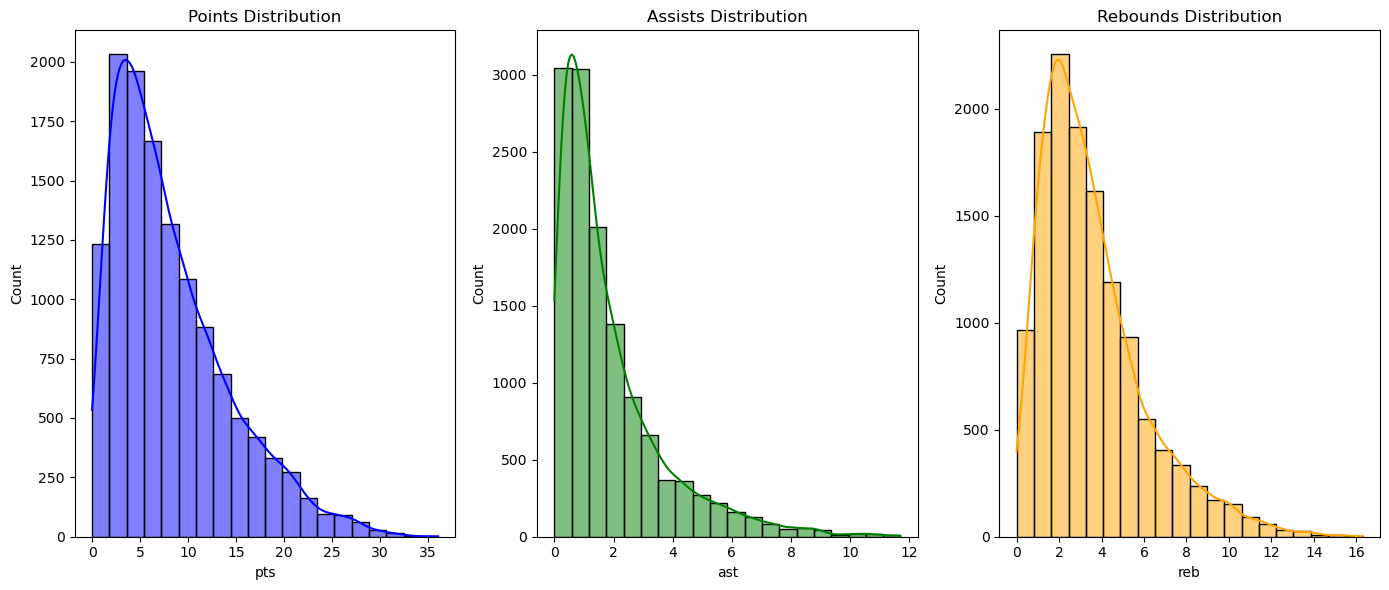

In [43]:
# Visualizing the distribution of Points, Assists, and Rebounds
plt.figure(figsize=(14, 6))

# Plotting Points
plt.subplot(1, 3, 1)
sns.histplot(df['pts'], kde=True, bins=20, color='blue')
plt.title('Points Distribution')

# Plotting Assists
plt.subplot(1, 3, 2)
sns.histplot(df['ast'], kde=True, bins=20, color='green')
plt.title('Assists Distribution')

# Plotting Rebounds
plt.subplot(1, 3, 3)
sns.histplot(df['reb'], kde=True, bins=20, color='orange')
plt.title('Rebounds Distribution')

plt.tight_layout()
plt.show()


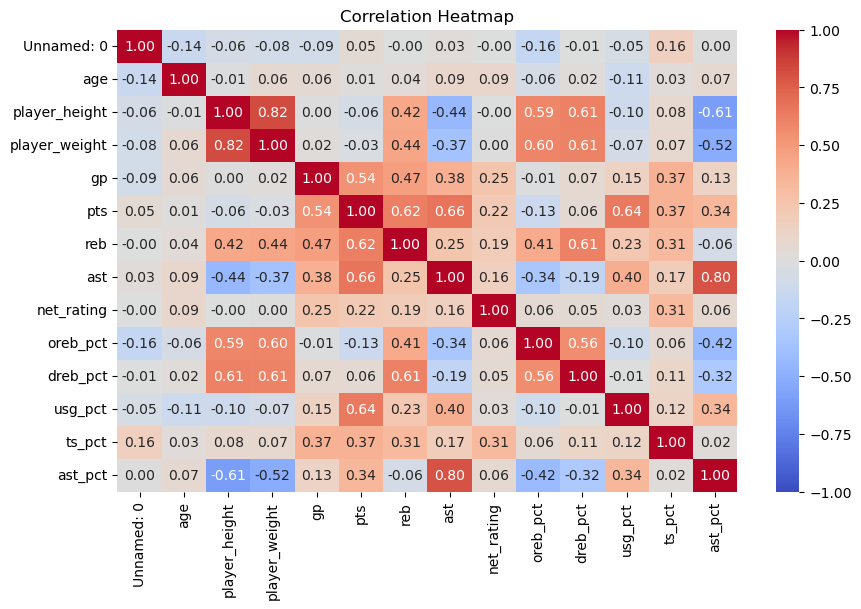

In [47]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [49]:
# Convert player height from cm to meters for BMI calculation
df['player_height_m'] = df['player_height'] / 100

# Calculate BMI: weight (kg) / height (m)^2
df['bmi'] = df['player_weight'] / (df['player_height_m']**2)

# You can now check the new columns
df[['player_name', 'player_weight', 'player_height', 'bmi']].head()


,player_name,player_weight,player_height,bmi
0,Randy Livingston,94.800728,193.04,25.439997
1,Gaylon Nickerson,86.182480,190.50,23.748109
2,George Lynch,103.418976,203.20,25.046833
3,George McCloud,102.058200,203.20,24.717270
4,George Zidek,119.748288,213.36,26.305303


In [53]:
# Drop non-numeric columns for correlation and model fitting
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns
corr = df_numeric.corr()

# Display the correlation of all numerical features with the target (points scored)
print(corr['pts'].sort_values(ascending=False))


pts                1.000000
ast                0.664320
usg_pct            0.641469
reb                0.624509
gp                 0.536003
ts_pct             0.373439
ast_pct            0.337339
net_rating         0.215199
dreb_pct           0.055669
Unnamed: 0         0.047024
bmi                0.026476
age                0.011353
player_weight     -0.025023
player_height_m   -0.055284
player_height     -0.055284
oreb_pct          -0.125164
Name: pts, dtype: float64


In [55]:
# Step 1: Feature Selection
features = ['ast', 'usg_pct', 'reb', 'gp']
X = df[features]
y = df['pts']

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_reg.predict(X_test)

# Evaluate model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Step 4: Ridge Regression Model
from sklearn.linear_model import Ridge

# Train the model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate model
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Output evaluation results
print(f"Linear Regression R-squared: {r2_lr:.4f}")


Linear Regression R-squared: 0.8141


In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Initialize the Ridge regression model with alpha = 1.0
ridge_model = Ridge(alpha=1.0)

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_predictions = ridge_model.predict(X_test)

# Calculate R-squared for Ridge regression
ridge_r2 = ridge_model.score(X_test, y_test)

# Calculate Mean Absolute Error for Ridge regression
ridge_mae = mean_absolute_error(y_test, ridge_predictions)

# Display the results
print(f'Ridge Regression R-squared: {ridge_r2:.4f}')
print(f'Ridge Regression MAE: {ridge_mae:.4f}')


Ridge Regression R-squared: 0.8134
Ridge Regression MAE: 1.9637
